In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bangkok = pd.read_csv('/Users/ishikapradhan/ML/Group Assignment/MLProj2024/data/raw/ishika/national-housing-authority.csv')

In [3]:
df_bangkok.head()

,date,pm25,pm10,o3,no2,so2,co
0,2024/10/1,53,,,,,
1,2024/10/2,52,,,,,
2,2024/10/3,61,,,,,
3,2024/10/4,53,,,,,
4,2024/10/5,69,,,,,


In [4]:
df_bangkok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3400 non-null   object
 1    pm25   3400 non-null   object
 2    pm10   3400 non-null   object
 3    o3     3400 non-null   object
 4    no2    3400 non-null   object
 5    so2    3400 non-null   object
 6    co     3400 non-null   object
dtypes: object(7)
memory usage: 186.1+ KB


In [5]:
df_bangkok.columns = df_bangkok.columns.str.strip()

In [6]:
# Converting pollutant columns to numeric, forcing errors to NaN
df_bangkok[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']] = df_bangkok[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].apply(pd.to_numeric, errors='coerce')

In [7]:
# Checking for missing values
df_bangkok.isnull().sum()

date       0
pm25     760
pm10     394
o3       545
no2      782
so2     1037
co      2946
dtype: int64

In [8]:
df_bangkok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3400 non-null   object 
 1   pm25    2640 non-null   float64
 2   pm10    3006 non-null   float64
 3   o3      2855 non-null   float64
 4   no2     2618 non-null   float64
 5   so2     2363 non-null   float64
 6   co      454 non-null    float64
dtypes: float64(6), object(1)
memory usage: 186.1+ KB


In [9]:
df_bangkok.describe()

,pm25,pm10,o3,no2,so2,co
count,2640.000000,3006.000000,2855.000000,2618.000000,2363.000000,454.000000
mean,72.896970,39.092482,19.260946,8.891138,2.726196,8.900881
std,24.931494,26.575634,15.925794,7.314643,2.516487,23.733739
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,55.000000,27.000000,10.000000,4.000000,2.000000,3.000000
50%,67.000000,36.000000,15.000000,7.000000,2.000000,6.000000
75%,84.000000,47.000000,23.000000,11.000000,3.000000,9.000000
max,178.000000,893.000000,295.000000,106.000000,42.000000,334.000000


In [10]:
# Convert the 'date' column to datetime format
df_bangkok['date'] = pd.to_datetime(df_bangkok['date'], format='%Y/%m/%d')


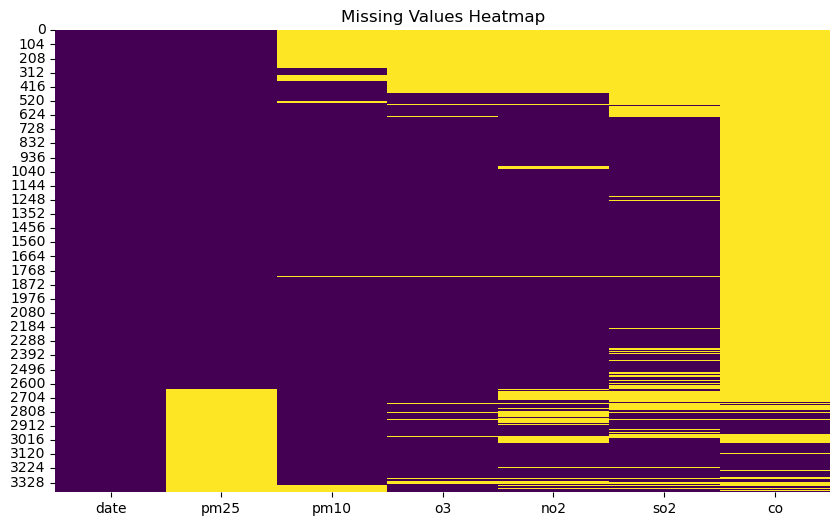

In [11]:
# Visualizing missing data
plt.figure(figsize=(10,6))
sns.heatmap(df_bangkok.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

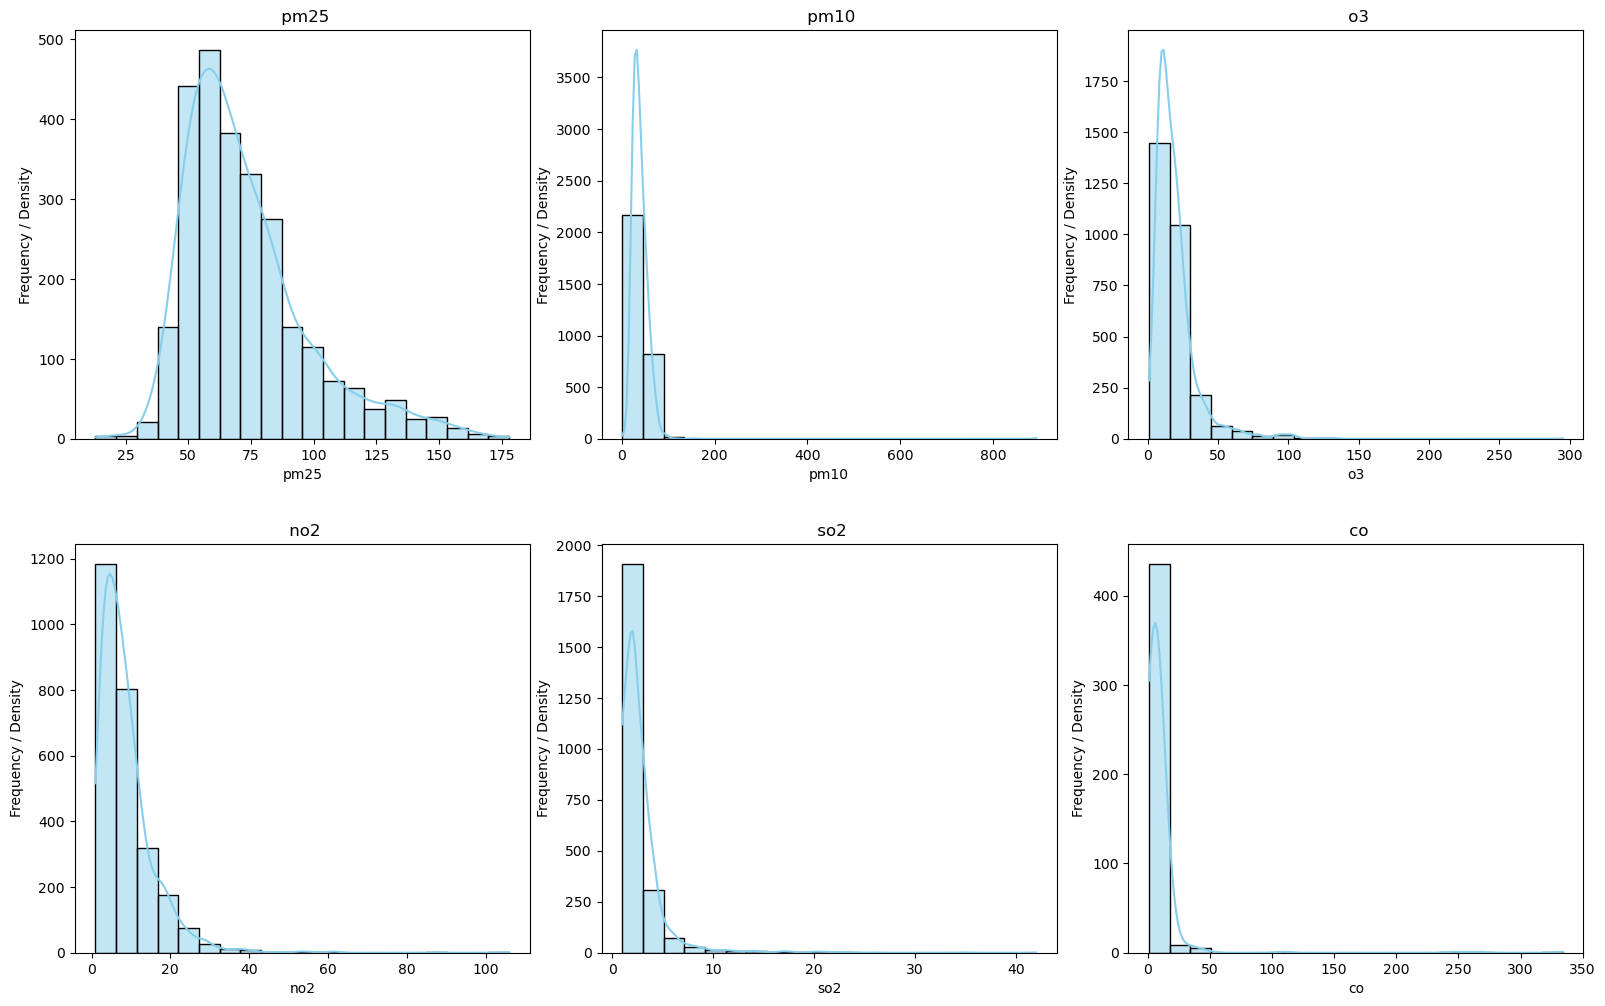

In [12]:
features = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# Create subplots with a grid layout
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(16, 10))  # Adjusted to fit 6 features
axs = axs.flatten()  # Flatten the axes array for easy indexing

# Loop over features and plot each one in its respective subplot
for index, feature in enumerate(features):
    sns.histplot(df_bangkok[feature], bins=20, kde=True, ax=axs[index], color='skyblue')
    axs[index].set_title(f' {feature}')
    axs[index].set_xlabel(feature)
    axs[index].set_ylabel('Frequency / Density')

# Adjust layout for readability
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)
plt.show()

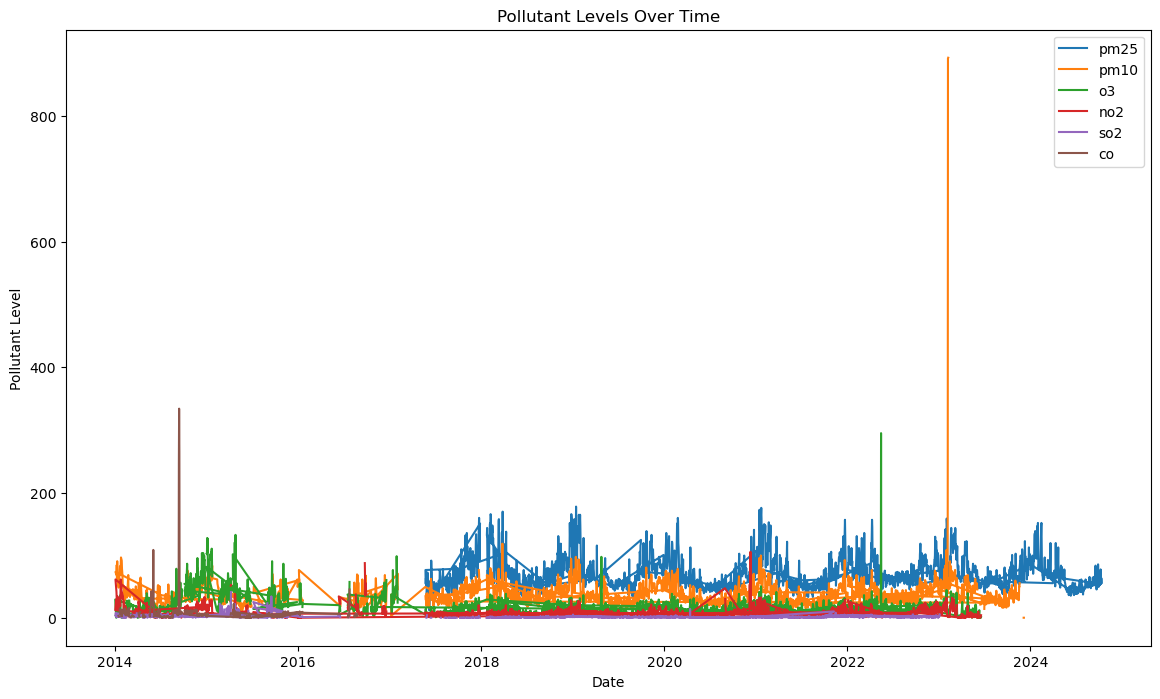

In [14]:
# Plot each pollutant over time



plt.figure(figsize=(14,8))

# Loop through the pollutant columns and plot them against the date
for column in ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']:
    plt.plot(df_bangkok['date'], df_bangkok[column], label=column.strip())

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.title('Pollutant Levels Over Time')
plt.legend()  # Display the legend
plt.show()

/var/folders/s1/nd91bl292j34yqm3cwjkp5kh0000gn/T/ipykernel_60036/2154236399.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_bangkok.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


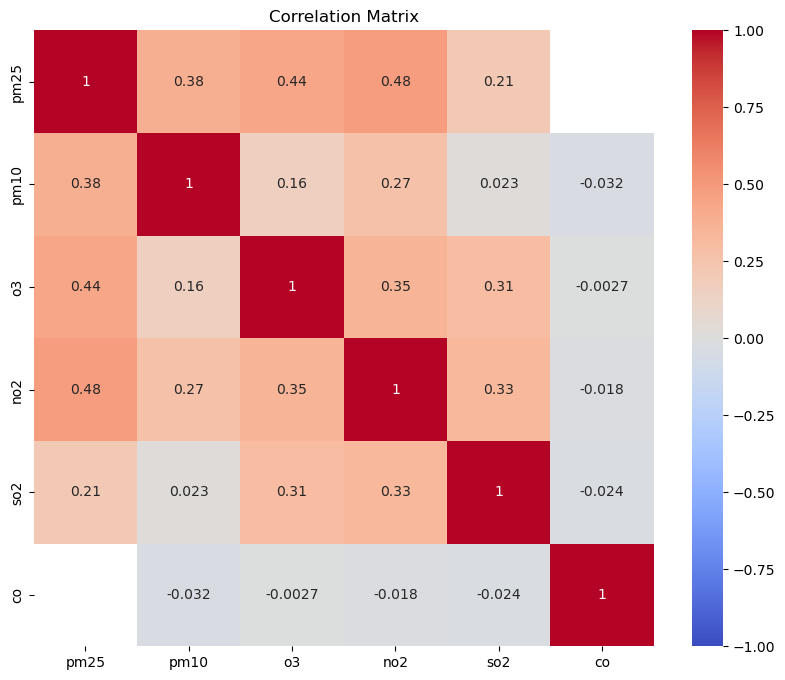

In [14]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_bangkok.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<Figure size 800x600 with 0 Axes>

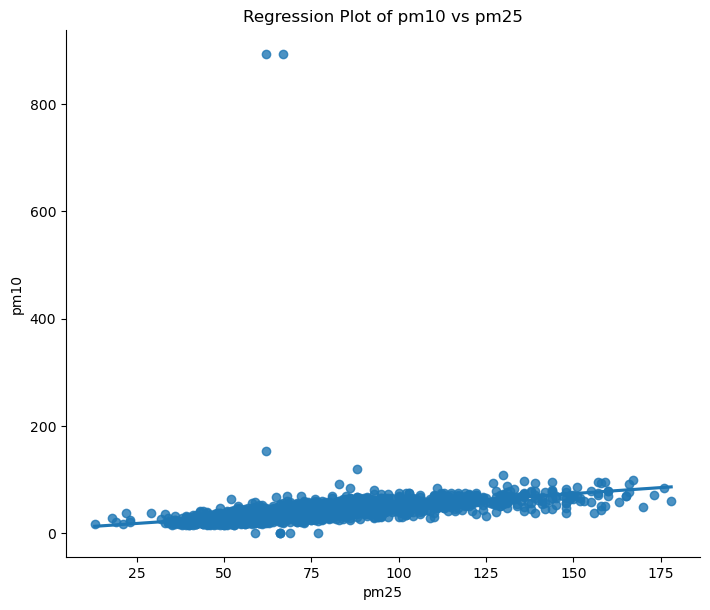

<Figure size 800x600 with 0 Axes>

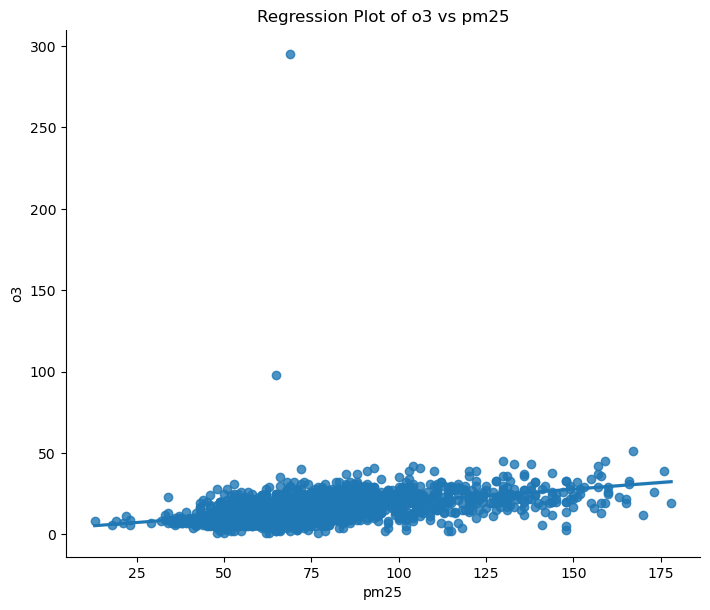

<Figure size 800x600 with 0 Axes>

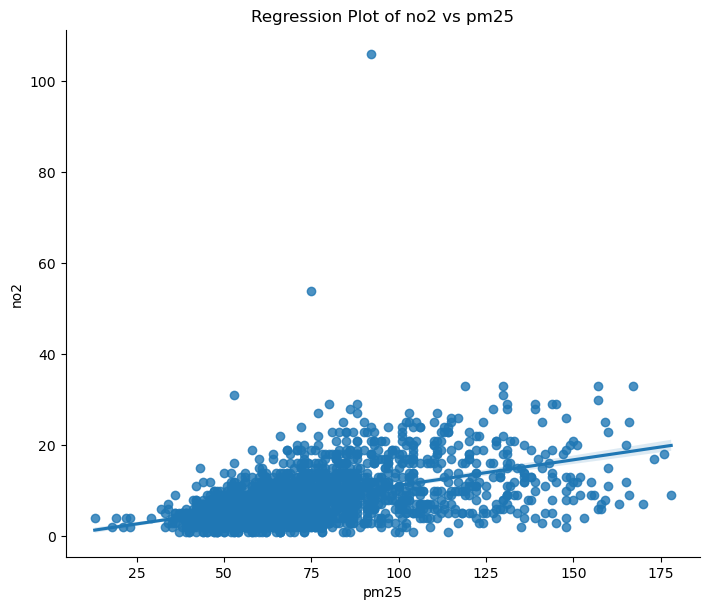

<Figure size 800x600 with 0 Axes>

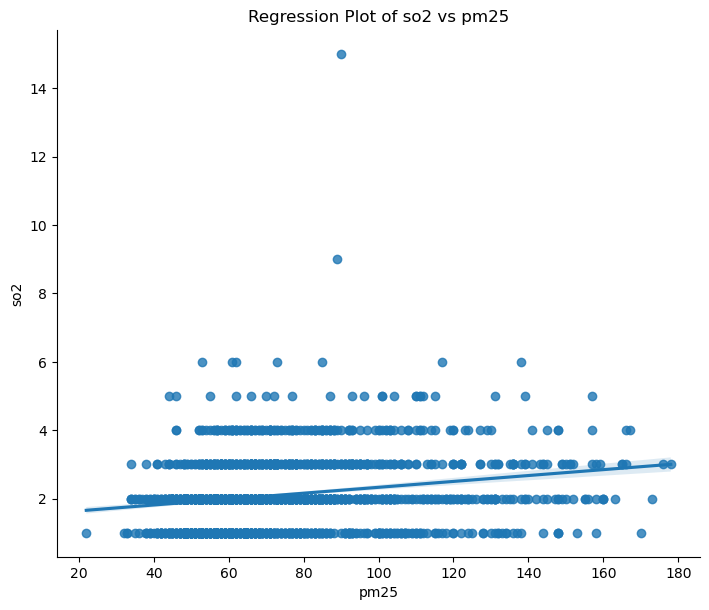

<Figure size 800x600 with 0 Axes>

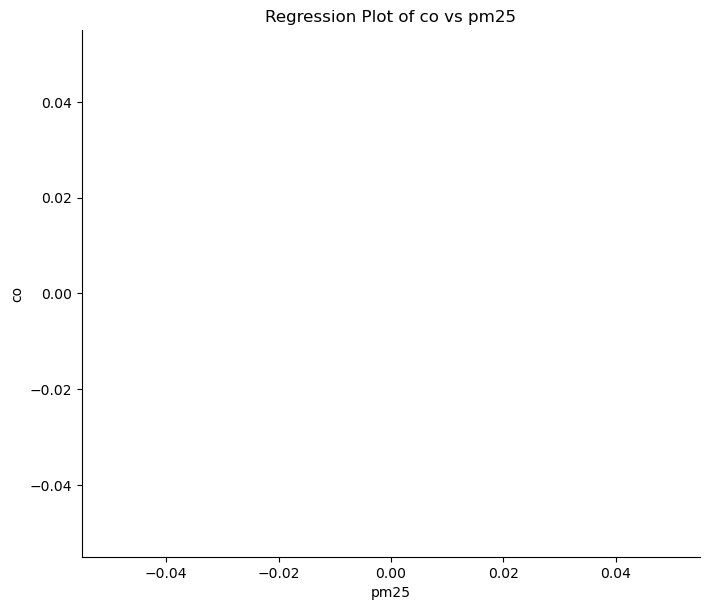

<Figure size 800x600 with 0 Axes>

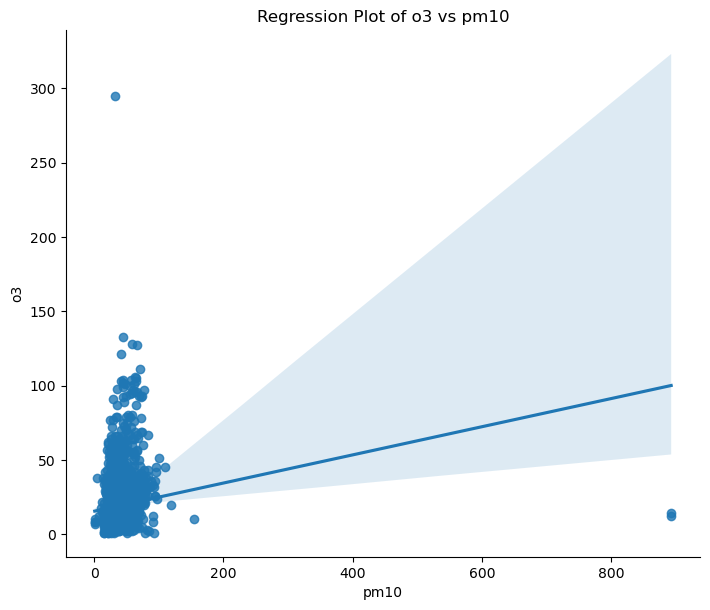

<Figure size 800x600 with 0 Axes>

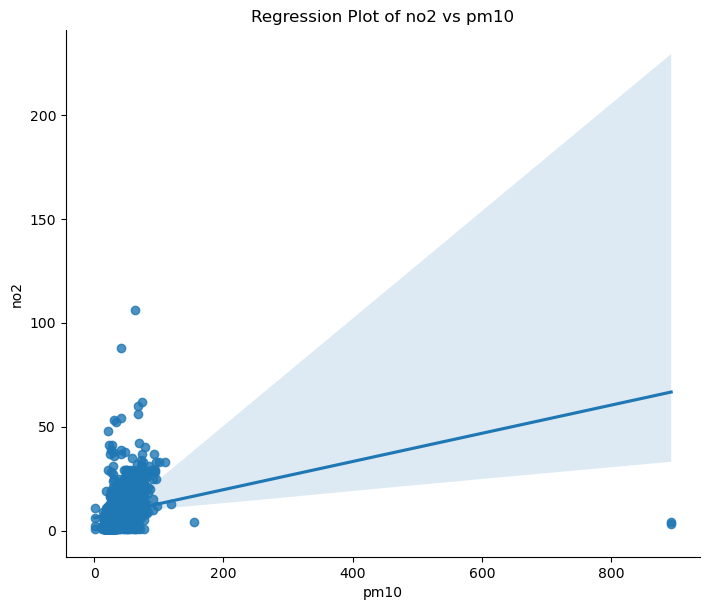

<Figure size 800x600 with 0 Axes>

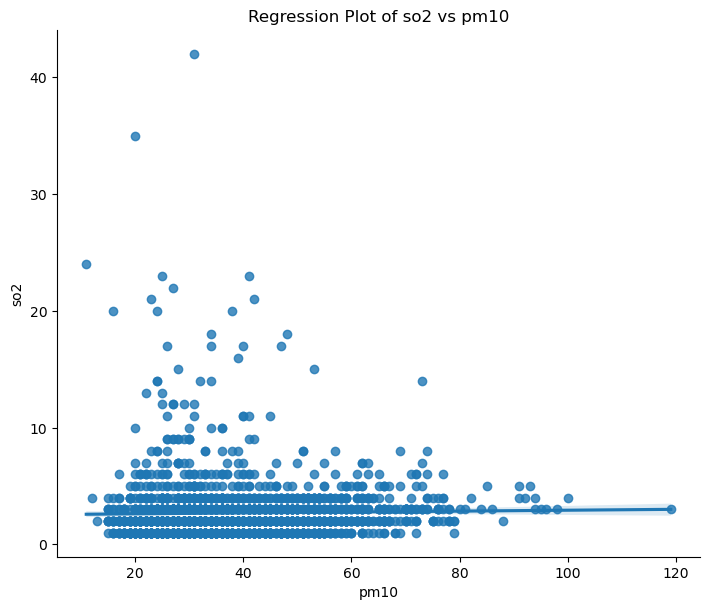

<Figure size 800x600 with 0 Axes>

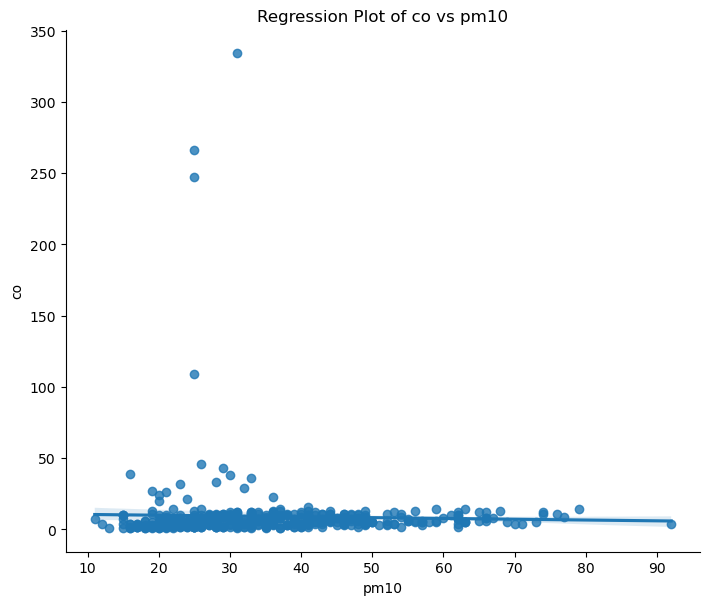

<Figure size 800x600 with 0 Axes>

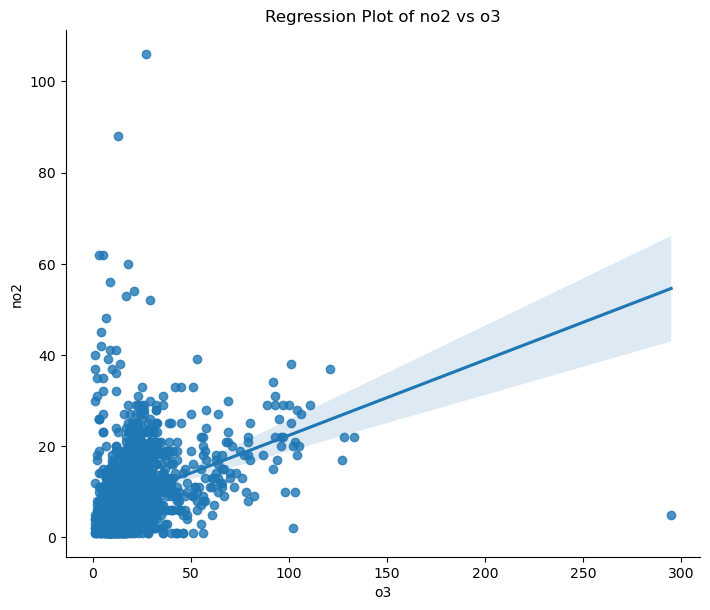

<Figure size 800x600 with 0 Axes>

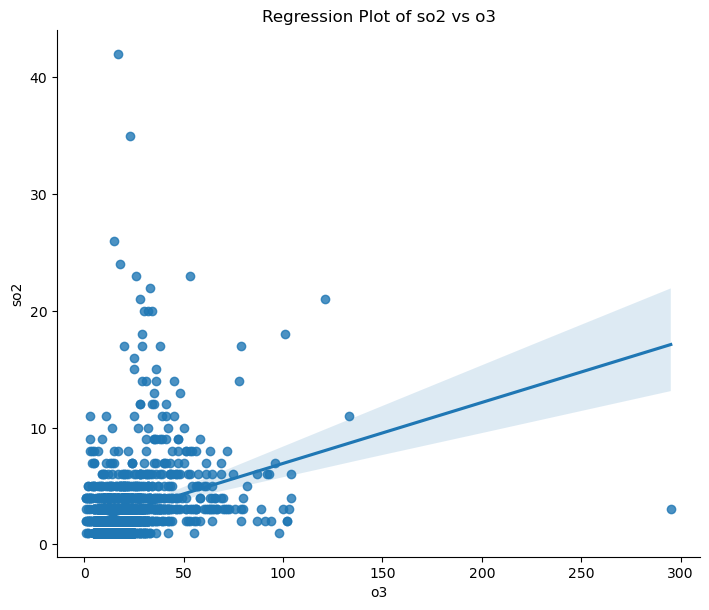

<Figure size 800x600 with 0 Axes>

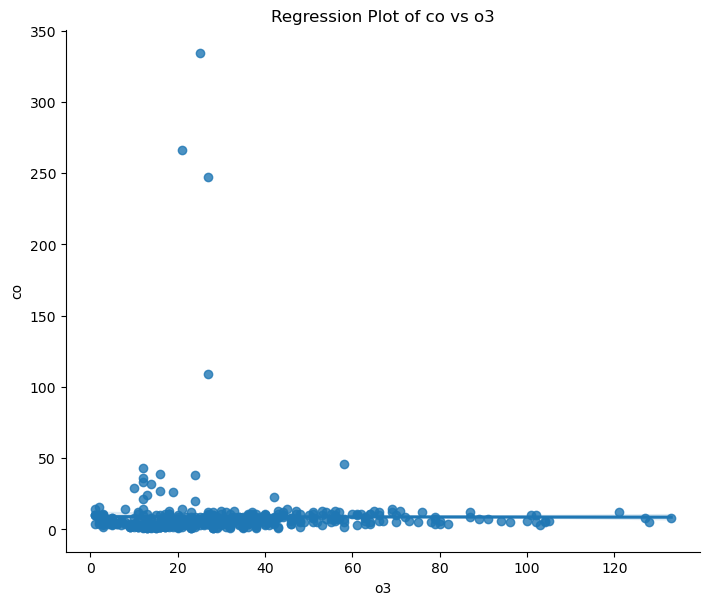

<Figure size 800x600 with 0 Axes>

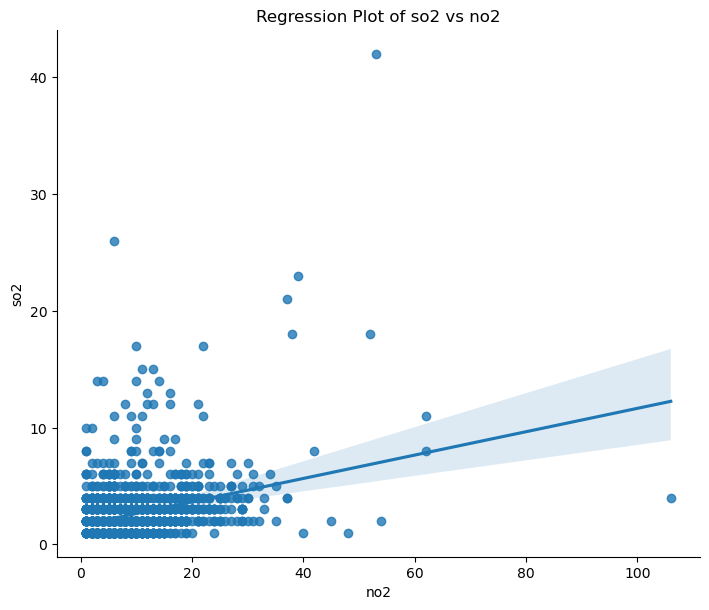

<Figure size 800x600 with 0 Axes>

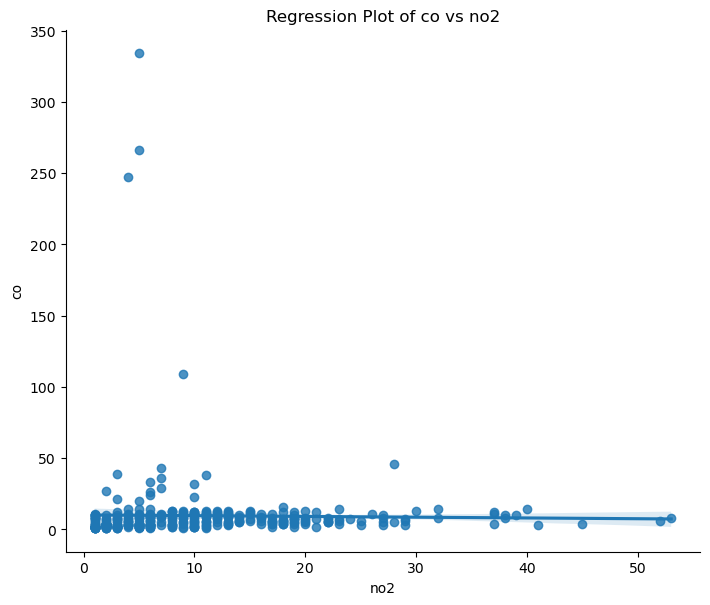

<Figure size 800x600 with 0 Axes>

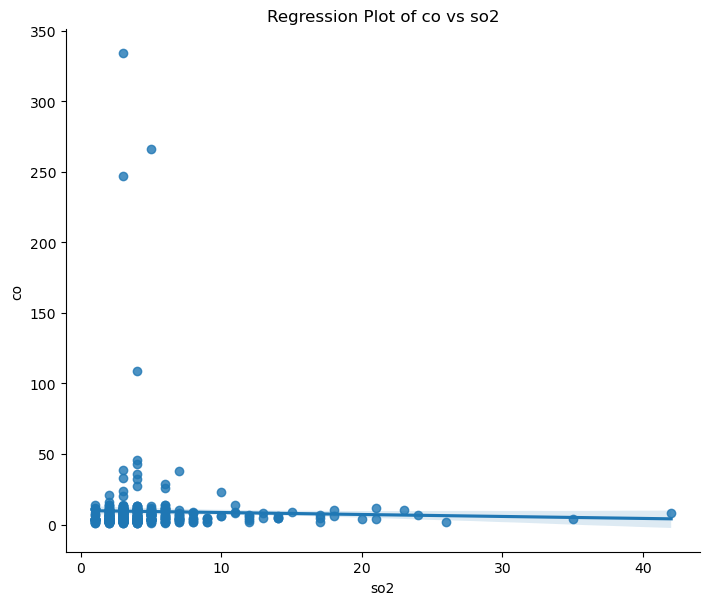

In [16]:
# Define columns to compare
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# Loop through each pair of columns and create a regression plot
for i, x_col in enumerate(pollutants):
    for y_col in pollutants[i+1:]:  # Ensures each pair is plotted only once
        plt.figure(figsize=(8, 6))
        sns.lmplot(x=x_col, y=y_col, data=df_bangkok, height=6, aspect=1.2)
        plt.title(f'Regression Plot of {y_col} vs {x_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()